# Trying put Pegasus Summerizer

##Install Dependencies

In [2]:
#Install PyTorch
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

Looking in indexes: https://download.pytorch.org/whl/cu121


In [3]:
#install Huggingface transformers
!pip install transformers

##Importing dependencies, load model


In [4]:
from transformers import PegasusForConditionalGeneration, PegasusTokenizer

In [5]:
#load tokenizer
tokenizer= PegasusTokenizer.from_pretrained("google/pegasus-xsum")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/87.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.52M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.39k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [6]:
#load model
model = PegasusForConditionalGeneration.from_pretrained("google/pegasus-xsum")

pytorch_model.bin:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-xsum and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/259 [00:00<?, ?B/s]

##Perform Abstractive Summerization

text from 'https://cloud.google.com/discover/what-is-deep-learning'

In [7]:
text=""" How does deep learning work?
Deep learning works by using artificial neural networks to learn from data. Neural networks are made up of layers of interconnected nodes, and each node is responsible for learning a specific feature of the data.  Building on our previous example with images – in an image recognition network, the first layer of nodes might learn to identify edges, the second layer might learn to identify shapes, and the third layer might learn to identify objects.

As the network learns, the weights on the connections between the nodes are adjusted so that the network can better classify the data. This process is called training, and it can be done using a variety of techniques, such as supervised learning, unsupervised learning, and reinforcement learning.

Once a neural network has been trained, it can be used to make predictions with new data it’s received.

Deep learning vs. machine learning
Both deep learning and machine learning are branches of artificial intelligence, with machine learning being a broader term encompassing various techniques, including deep learning. Both machine learning and deep learning algorithms can be trained on labeled or unlabeled data, depending on the task and algorithm.

Machine learning and deep learning are both applicable to tasks such as image recognition, speech recognition, and natural language processing. However, deep learning often outperforms traditional machine learning in complex pattern recognition tasks like image classification and object detection due to its ability to learn hierarchical representations of data.
"""

In [8]:
#turning text to tokens
tokens=tokenizer(text, padding="longest" , truncation= True, return_tensors="pt")

In [9]:
tokens

{'input_ids': tensor([[  722,   358,  1355,   761,   201,   152,  7496,   761,   659,   141,
           303,  4958, 14849,  3296,   112,   543,   135,   335,   107, 45077,
          3296,   127,   266,   164,   113,  4427,   113, 24305, 11406,   108,
           111,   276,  9537,   117,  1470,   118,   761,   114,   739,  1048,
           113,   109,   335,   107,  3671,   124,   150,  1331,   587,   122,
          1055,   212,   115,   142,   805,  3771,   952,   108,   109,   211,
          2865,   113, 11406,   382,   543,   112,  1956,  5198,   108,   109,
           453,  2865,   382,   543,   112,  1956,  4664,   108,   111,   109,
           776,  2865,   382,   543,   112,  1956,  3195,   107,   398,   109,
           952, 23153,   108,   109, 11835,   124,   109,  3649,   317,   109,
         11406,   127,  7460,   167,   120,   109,   952,   137,   340, 27648,
           109,   335,   107,   182,   366,   117,   568,   569,   108,   111,
           126,   137,   129,   479,  

In [10]:
{**tokens}

{'input_ids': tensor([[  722,   358,  1355,   761,   201,   152,  7496,   761,   659,   141,
            303,  4958, 14849,  3296,   112,   543,   135,   335,   107, 45077,
           3296,   127,   266,   164,   113,  4427,   113, 24305, 11406,   108,
            111,   276,  9537,   117,  1470,   118,   761,   114,   739,  1048,
            113,   109,   335,   107,  3671,   124,   150,  1331,   587,   122,
           1055,   212,   115,   142,   805,  3771,   952,   108,   109,   211,
           2865,   113, 11406,   382,   543,   112,  1956,  5198,   108,   109,
            453,  2865,   382,   543,   112,  1956,  4664,   108,   111,   109,
            776,  2865,   382,   543,   112,  1956,  3195,   107,   398,   109,
            952, 23153,   108,   109, 11835,   124,   109,  3649,   317,   109,
          11406,   127,  7460,   167,   120,   109,   952,   137,   340, 27648,
            109,   335,   107,   182,   366,   117,   568,   569,   108,   111,
            126,   137,   1

In [11]:
#Summerize

summary=model.generate(**tokens,min_length=50)

In [12]:
#summary in tokens
summary

tensor([[   0, 7496,  761,  117,  114, 4444,  113, 4958, 3941,  120,  117,  263,
          112, 1976, 8970,  112,  543,  135,  335,  108,  253,  130,  805, 3771,
          132, 2951, 6254,  107, 1157,  761,  127, 6106,  113, 4958, 3941,  108,
          111,  302, 1355,  761,  111, 1157,  761,  127,  263,  112, 1976, 8970,
          112,  543,  135,  335,  108,  253,  130,  805, 3771,  132, 2951, 6254,
          107,    1]])

In [13]:
#Decode the summary
tokenizer.decode(summary[0])

'<pad>Deep learning is a branch of artificial intelligence that is used to train algorithms to learn from data, such as image recognition or object detection. machine learning are branches of artificial intelligence, and both deep learning and machine learning are used to train algorithms to learn from data, such as image recognition or object detection.</s>'

#Web Scraping blogs and summerizing using hugging face transformer

##Importing Dependencies

In [14]:
import requests
from transformers import pipeline
from bs4 import BeautifulSoup

In [15]:
summerizer = pipeline('summarization')
#can use t5-11b model too but its size is 45GB

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


## Get Blog Post from Medium

In [16]:
URL=r'https://distill.pub/2020/grand-tour/'

In [17]:
r = requests.get(URL)

'<!DOCTYPE html><html lang="en"><head><meta charset="utf-8"><meta name="viewport" content="width=device-width, initial-scale=1"><meta http-equiv="X-UA-Compatible" content="IE=Edge,chrome=1"><script>\nwindow.addEventListener(\'WebComponentsReady\', function() {\n  console.warn(\'WebComponentsReady\');\n  const loaderTag = document.createElement(\'script\');\n  loaderTag.src = \'https://distill.pub/template.v2.js\';\n  document.head.insertBefore(loaderTag, document.head.firstChild);\n});\n</script><script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.0.17/webcomponents-loader.js"></script>\n\n\n<style id="distill-prerendered-styles" type="text/css">/*\n * Copyright 2018 The Distill Template Authors\n *\n * Licensed under the Apache License, Version 2.0 (the "License");\n * you may not use this file except in compliance with the License.\n * You may obtain a copy of the License at\n *\n *      http://www.apache.org/licenses/LICENSE-2.0\n *\n * Unless required by applicable
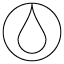

In [18]:
r.text

In [39]:
#now to extract the test from the entire html code

soup= BeautifulSoup(r.text, 'html.parser')
results= soup.find_all(['p','h2'])

In [40]:
results

[<p></p>,
 <p class="author">
 <a class="name" href="http://hdc.cs.arizona.edu/~mwli/">Mingwei Li</a>
 </p>,
 <p class="affiliation">
 <a class="affiliation" href="https://www.cs.arizona.edu/">University of Arizona</a>
 </p>,
 <p class="author">
 <a class="name" href="https://zhengezhao.wordpress.com/">Zhenge Zhao</a>
 </p>,
 <p class="affiliation">
 <a class="affiliation" href="https://www.cs.arizona.edu/">University of Arizona</a>
 </p>,
 <p class="author">
 <a class="name" href="https://cscheid.net/">Carlos Scheidegger</a>
 </p>,
 <p class="affiliation">
 <a class="affiliation" href="https://www.cs.arizona.edu/">University of Arizona</a>
 </p>,
 <p>March 16, 2020</p>,
 <p><a href="https://doi.org/10.23915/distill.00025">10.23915/distill.00025</a></p>,
 <p>
   The Grand Tour<d-cite key="asimov1985grand"></d-cite> is a classic visualization technique for high-dimensional point clouds that <em>projects</em> a high-dimensional dataset into two dimensions.
 
   Over time, the Grand Tour 

In [41]:
text=[result.text for result in results]
ARTICLE = ' '.join(text)

In [22]:
ARTICLE

' \nMingwei Li\n \nUniversity of Arizona\n \nZhenge Zhao\n \nUniversity of Arizona\n \nCarlos Scheidegger\n \nUniversity of Arizona\n March 16, 2020 10.23915/distill.00025 \n  The Grand Tour is a classic visualization technique for high-dimensional point clouds that projects a high-dimensional dataset into two dimensions.\n\n  Over time, the Grand Tour smoothly animates its projection so that every possible view of the dataset is (eventually) presented to the viewer.\n\n  Unlike modern nonlinear projection methods such as t-SNE and UMAP, the Grand Tour is fundamentally a linear method.\n\n  In this article, we show how to leverage the linearity of the Grand Tour to enable a number of capabilities that are uniquely useful to visualize the behavior of neural networks.\n  \n  Concretely, we present three use cases of interest: visualizing the training process as the network weights change, visualizing the layer-to-layer behavior as the data goes through the network and visualizing both ho

## Chunk Text

In [42]:
max_chunk = 500

In [43]:
#since the summarizer may not be able to take a large amount of text together
#we chunk the text

ARTICLE = ARTICLE.replace('.', '.<eos>')
ARTICLE = ARTICLE.replace('?', '?<eos>')
ARTICLE = ARTICLE.replace('!', '!<eos>')
ARTICLE = ARTICLE.replace('\n', '')
sentences = ARTICLE.split('<eos>')

In [25]:
sentences

[' Mingwei Li University of Arizona Zhenge Zhao University of Arizona Carlos Scheidegger University of Arizona March 16, 2020 10.',
 '23915/distill.',
 '00025   The Grand Tour is a classic visualization technique for high-dimensional point clouds that projects a high-dimensional dataset into two dimensions.',
 '  Over time, the Grand Tour smoothly animates its projection so that every possible view of the dataset is (eventually) presented to the viewer.',
 '  Unlike modern nonlinear projection methods such as t-SNE and UMAP, the Grand Tour is fundamentally a linear method.',
 '  In this article, we show how to leverage the linearity of the Grand Tour to enable a number of capabilities that are uniquely useful to visualize the behavior of neural networks.',
 '    Concretely, we present three use cases of interest: visualizing the training process as the network weights change, visualizing the layer-to-layer behavior as the data goes through the network and visualizing both how adversari

In [44]:
sentences = ARTICLE.split('<eos>')
current_chunk = 0
chunks = []
for sentence in sentences:
    if len(chunks) == current_chunk + 1:
        if len(chunks[current_chunk]) + len(sentence.split(' ')) <= max_chunk:
            chunks[current_chunk].extend(sentence.split(' '))
        else:
            current_chunk += 1
            chunks.append(sentence.split(' '))
    else:
        print(current_chunk)
        chunks.append(sentence.split(' '))

for chunk_id in range(len(chunks)):
    chunks[chunk_id] = ' '.join(chunks[chunk_id])

0


In [28]:
chunks[-2]

' Mingwei Li University of Arizona Zhenge Zhao University of Arizona Carlos Scheidegger University of Arizona March 16, 2020 10. 23915/distill. 00025   The Grand Tour is a classic visualization technique for high-dimensional point clouds that projects a high-dimensional dataset into two dimensions.   Over time, the Grand Tour smoothly animates its projection so that every possible view of the dataset is (eventually) presented to the viewer.   Unlike modern nonlinear projection methods such as t-SNE and UMAP, the Grand Tour is fundamentally a linear method.   In this article, we show how to leverage the linearity of the Grand Tour to enable a number of capabilities that are uniquely useful to visualize the behavior of neural networks.     Concretely, we present three use cases of interest: visualizing the training process as the network weights change, visualizing the layer-to-layer behavior as the data goes through the network and visualizing both how adversarial examples are crafted a

In [51]:
len(chunks[-2].split(' '))

462

In [31]:
len(chunks)

15

In [50]:
len(chunks[-2])

3309

## Summerization

In [53]:
res= summerizer(chunks, max_length=120, min_length=30, do_sample=False)
#could make it shorter by changing the max length parameter

IndexError: index out of range in self

In [54]:
#Import necessary library
from transformers import BartTokenizer, BartForConditionalGeneration, BartConfig

# Assuming 'chunks' is a list of text strings,
# and 'summerizer' is a SummarizationPipeline instance.

# Check if the tokenizer is defined in the summerizer pipeline
if hasattr(summerizer, "tokenizer"):
  tokenizer = summerizer.tokenizer
else:
  # If not, instantiate a new tokenizer based on the model used in the pipeline
  model_name = summerizer.model.config.name_or_path  # Get the model name from the pipeline
  tokenizer = BartTokenizer.from_pretrained(model_name)

# Process each chunk individually to avoid exceeding maximum sequence length:
processed_chunks = []
for chunk in chunks:
    # Tokenize the chunk and truncate if necessary
    inputs = tokenizer(chunk, return_tensors="pt", max_length=150, truncation=True)

    # Decode the tokens back to text
    processed_chunk = tokenizer.decode(inputs["input_ids"][0], skip_special_tokens=True)

    # Add the processed chunk to the list
    processed_chunks.append(processed_chunk)

# Now call the summarizer with the processed chunks:
res = summerizer(processed_chunks, max_length=150, min_length=30, do_sample=False)

In [55]:
len(res)

15

In [58]:
res

[{'summary_text': ' The Grand Tour is a classic visualization technique for high-dimensional point clouds . Unlike modern nonlinear projection methods such as t-SNE and UMAP, it is fundamentally a linear method . We show how to leverage the linearity of the Grand Tour to enable a number of capabilities that are uniquely useful to us .'},
 {'summary_text': ' Deep neural networks often confine their nonlinearity to a small set of operations . Our proposed method better preserves context by providing more consistency . It should be possible to know how the visualization  would change, if the data had been different in a particular way .'},
 {'summary_text': ' The softmax, for example, can be seen as a 10-vector whose values are positive real numbers that sum up to 1 . The intermediate values after any one of the functions in composition, or activations of neurons after a layer, can also be seen in Rn\\mathbb{R}^nRn, where nnn is the number of neurons in the layer .'},
 {'summary_text': ' 

## Output to text file




In [56]:
text=' '.join([ summ['summary_text'] for summ in res])

In [59]:
text

' The Grand Tour is a classic visualization technique for high-dimensional point clouds . Unlike modern nonlinear projection methods such as t-SNE and UMAP, it is fundamentally a linear method . We show how to leverage the linearity of the Grand Tour to enable a number of capabilities that are uniquely useful to us .  Deep neural networks often confine their nonlinearity to a small set of operations . Our proposed method better preserves context by providing more consistency . It should be possible to know how the visualization  would change, if the data had been different in a particular way .  The softmax, for example, can be seen as a 10-vector whose values are positive real numbers that sum up to 1 . The intermediate values after any one of the functions in composition, or activations of neurons after a layer, can also be seen in Rn\\mathbb{R}^nRn, where nnn is the number of neurons in the layer .  Although the network learns to recognize digits 0, 2, 3, 4, 5, 6, 8 and 9 early on, 

In [57]:
with open('blogSummaru.txt', 'w') as f:
  f.write(text)